<a href="https://colab.research.google.com/github/ManasviEmmadi/ML_AI_Projects/blob/main/cnn_cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import datasets, layers, models
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test)=datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train= y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))#uhhh
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

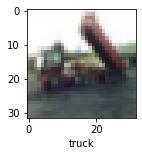

In [ ]:
plot_sample(X_train, y_train, 2)

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
cnn  = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4762 - accuracy: 0.4714
Epoch 2/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.1110 - accuracy: 0.6105
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9776 - accuracy: 0.6592
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8946 - accuracy: 0.6873
Epoch 5/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8323 - accuracy: 0.7104
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7707 - accuracy: 0.7333
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7246 - accuracy: 0.7453
Epoch 8/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6834 - accuracy: 0.7605
Epoch 9/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6456 - accuracy: 0.7742
Epoch 10/10
1563/1563 [==============================] - 62s 39m

In [ ]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.9094 - accuracy: 0.7069


[0.9094451069831848, 0.7069000005722046]

In [ ]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

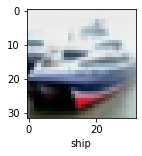

In [ ]:
y_test= y_test.reshape(-1,)
plot_sample(X_test, y_test, 1)

In [ ]:
y_pred= cnn.predict(X_test)
y_pred[:5]

array([[1.14094379e-04, 1.45833419e-05, 2.35558115e-03, 9.62866127e-01,
        1.02372833e-05, 3.35976155e-03, 2.01536510e-02, 9.78433818e-05,
        1.09050432e-02, 1.23141755e-04],
       [2.63539534e-02, 2.35541180e-01, 1.23277177e-05, 8.89049318e-07,
        7.85900838e-08, 6.02514527e-09, 9.59756608e-10, 2.29029311e-08,
        7.37999558e-01, 9.19533195e-05],
       [1.98560938e-01, 6.74738646e-01, 3.51526600e-04, 3.23140086e-03,
        1.28471467e-04, 7.82714167e-04, 4.99839480e-05, 4.72683052e-04,
        1.02629006e-01, 1.90546140e-02],
       [8.44616771e-01, 3.95083567e-04, 5.35830185e-02, 6.32996671e-03,
        2.80992757e-03, 2.99242329e-05, 5.85650632e-05, 3.85027291e-04,
        9.17811617e-02, 1.05571698e-05],
       [1.19250927e-07, 7.35897447e-06, 8.29543639e-03, 2.54550874e-01,
        2.58707050e-02, 9.02434066e-03, 7.02174604e-01, 1.37809934e-07,
        7.59940158e-05, 4.52623112e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

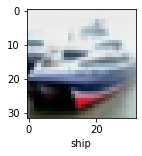

In [ ]:
plot_sample(X_test, y_test, 1)

In [ ]:
classes[y_classes[1]]

'ship'